In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [276]:
from sklearn.datasets import load_boston

In [277]:
boston = load_boston()

In [278]:
type(boston)

sklearn.utils.Bunch

In [279]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [280]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [281]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


### Preparing the dataset

In [282]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [283]:
df.shape

(506, 13)

- Adding Target Column to dataset

In [284]:
df['Price'] = boston.target

In [285]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Basic EDA

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [287]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


- Checking missing values

In [288]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

- Finding CORRELATION between dependent and independent variables

In [289]:
df.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [290]:
# sns.pairplot(df)

<AxesSubplot:>

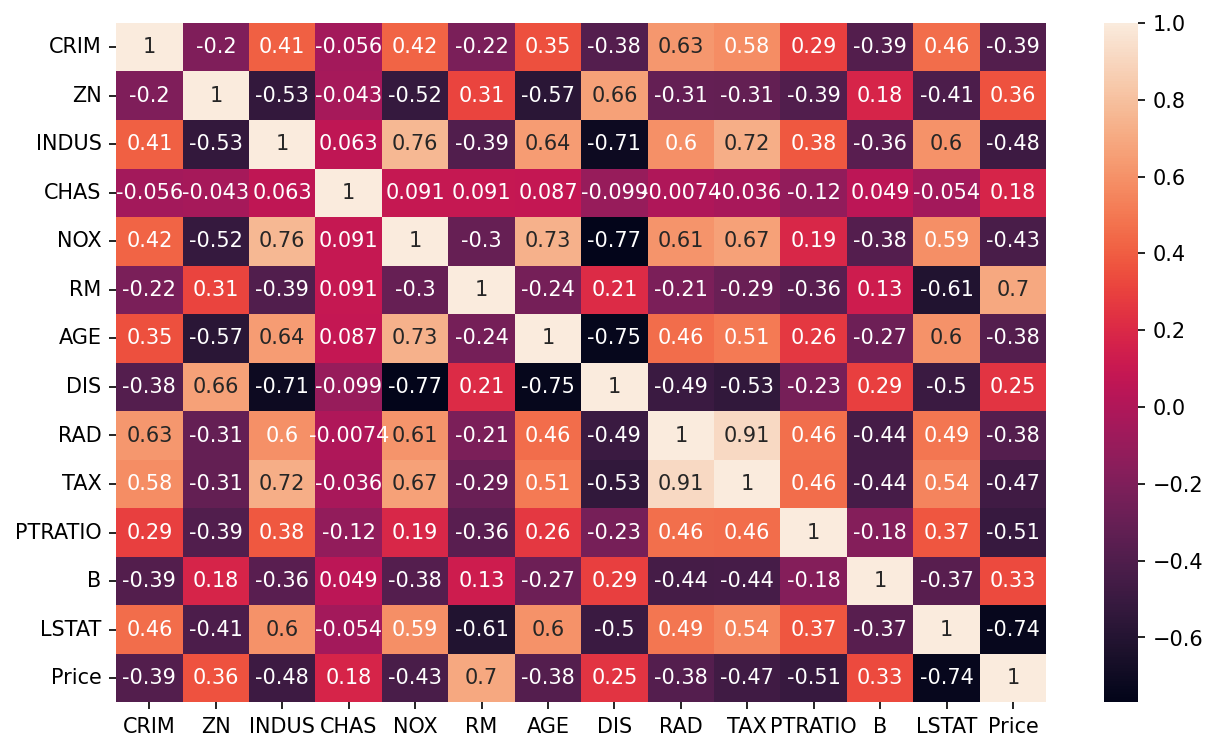

In [291]:
plt.figure(figsize=(10,6), dpi=150)

sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='CRIM', ylabel='Price'>

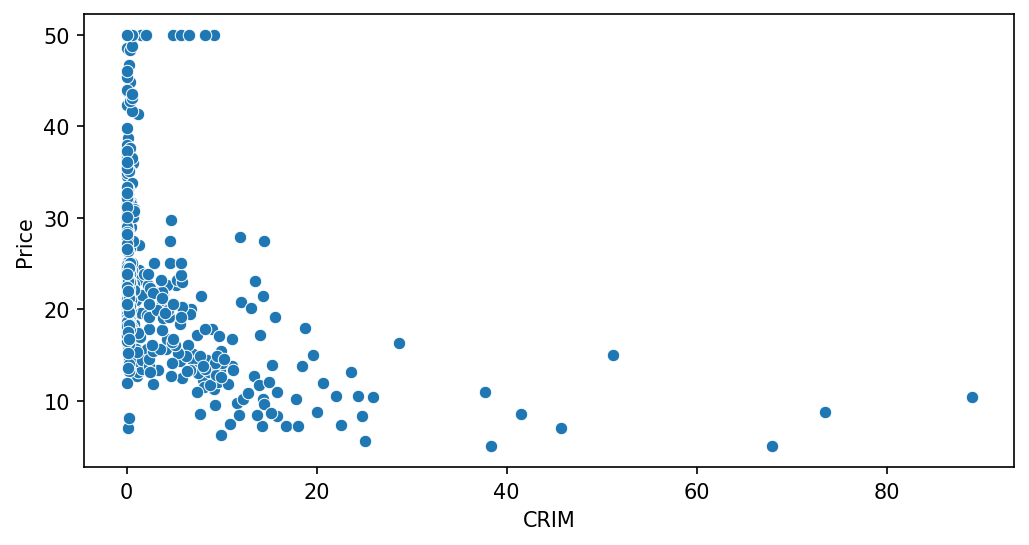

In [292]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(data=df, y='Price', x='CRIM', palette='tab10')

In [293]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='RM', ylabel='Price'>

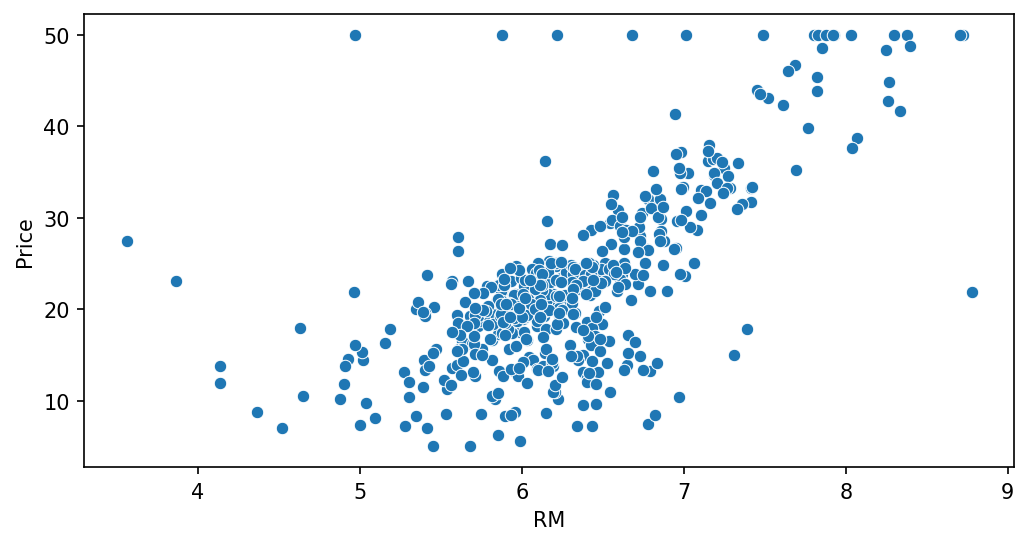

In [294]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(data=df, y='Price', x='RM', palette='tab10')

<AxesSubplot:xlabel='RM', ylabel='Price'>

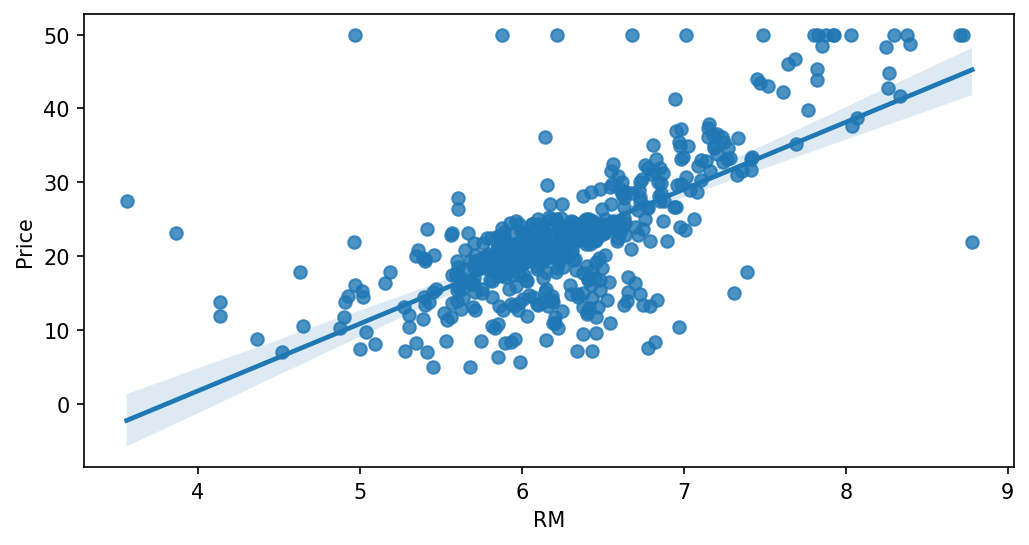

In [295]:
plt.figure(figsize=(8,4), dpi=150)

sns.regplot(x='RM', y='Price',data=df)

## The shaded region we see, is RIDGE and LASSO

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

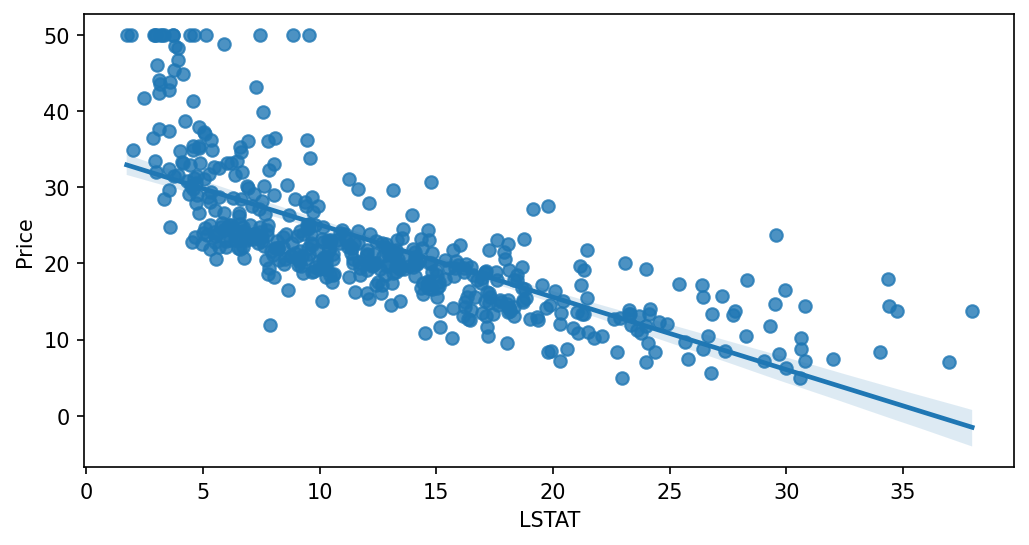

In [296]:
plt.figure(figsize=(8,4), dpi=150)

sns.regplot(x='LSTAT', y='Price',data=df)

## The shaded region we see, is RIDGE and LASSO

<AxesSubplot:xlabel='CRIM'>

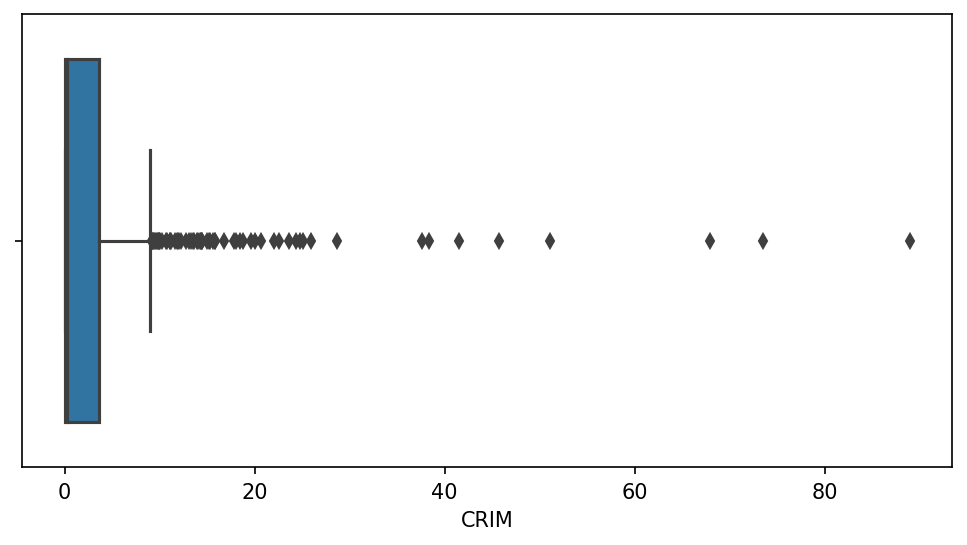

In [297]:
plt.figure(figsize=(8,4), dpi=150)

sns.boxplot(x=df['CRIM'])

### TRAINING THE MODEL

In [298]:
# Dependent and Independent features

X = df.drop('Price', axis=1)

y = df.iloc[:, -1]

In [299]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [300]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [303]:
X_train.shape

(339, 13)

In [304]:
y_train.shape

(339,)

Q) By using Feature Scaling, can we reach the Global Minima quickly? If yes, HOW ??

    - Yes, If all the features are brought under a same scale. Gradient Descent calculation will become easy.

### Standardize/Feature Scaling the Features

In [305]:
from sklearn.preprocessing import StandardScaler

In [306]:
scaler = StandardScaler()

In [307]:
X_train = scaler.fit_transform(X_train)

In [308]:
# to avoid data leakage, we just TRANSFORM the data

## While performing fit_transform(), we calculate z score by using mean and sd of train data. And the model shouln't be aware of any of the propertiesof the test data.
## So, we calculate the z-scores value for test data by using mean and sd of TRAIN data only. Hence, only transform() for TEST DATA.

## Its like writing(model prediction for test data) an exam by learning form the syallabus(test data and its mean, sd). Not by knowing the questions(data leakage)
## from the test paper before the exam(i.r by not doint fit_transform() on test data)

X_test = scaler.transform(X_test)

### MODEL TRAINING

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
model = LinearRegression()

In [311]:
model.fit(X_train, y_train)

LinearRegression()

In [312]:
## All the coefficients for 13 features

model.coef_

array([-0.98858032,  0.86793276,  0.40502822,  0.86183791, -1.90009974,
        2.80813518, -0.35866856, -3.04553498,  2.03276074, -1.36400909,
       -2.0825356 ,  1.04125684, -3.92628626])

In [313]:
## INTERCEPT for the equation

model.intercept_

22.970796460176988

### Prediction for TEST data

In [314]:
predictions = model.predict(X_test)

## ASSUMPTIONS

1. Linear 

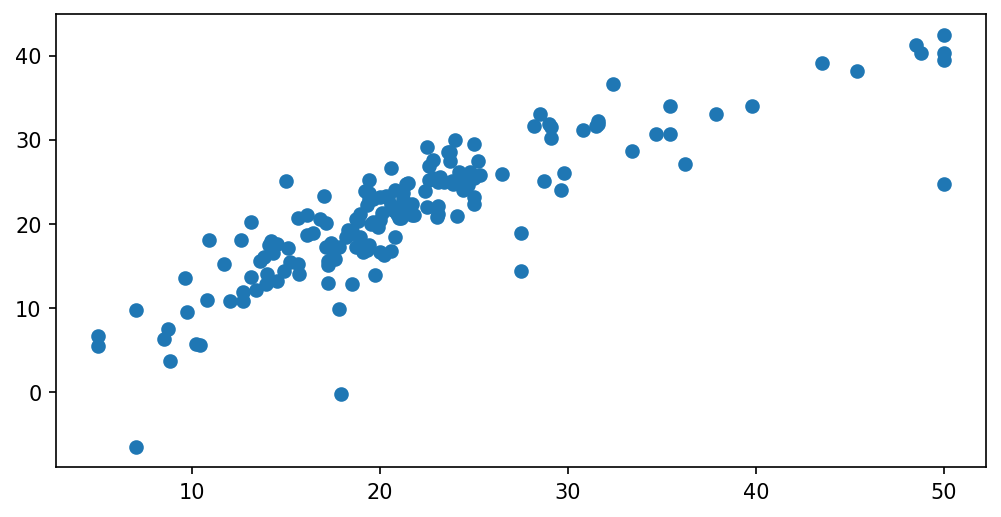

In [315]:
plt.figure(figsize=(8,4), dpi=150)

plt.scatter(y_test, predictions)

## TRUTH POINT VS PREDICTED POINT should be LINEAR

2. NORMAL distribution of Residuals (errors)

In [316]:
## CALCULATING RESIDUALS

residuals = y_test - predictions

In [317]:
residuals

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: Price, Length: 167, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

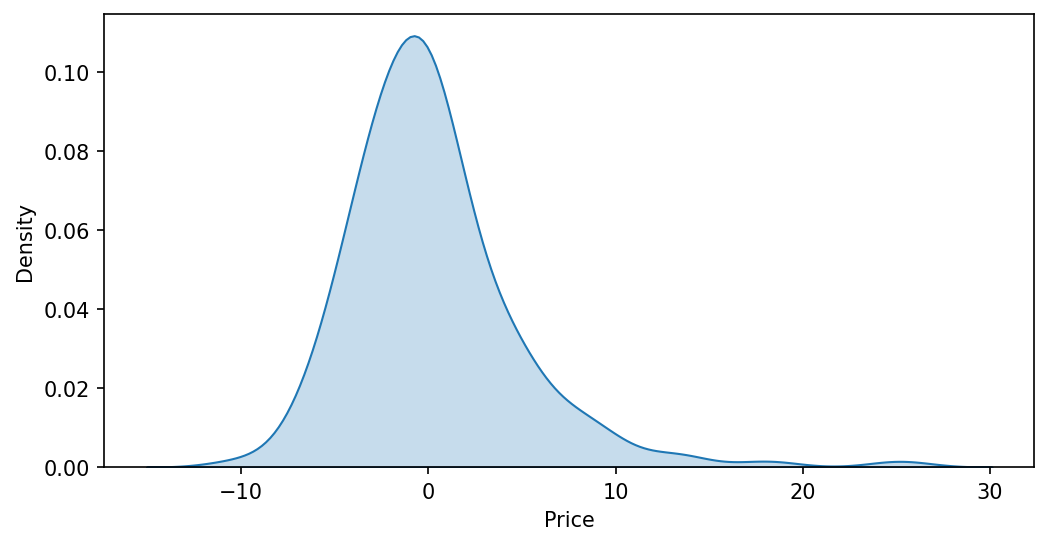

In [318]:
plt.figure(figsize=(8,4), dpi=150)

# sns.displot(residuals, kde=True)

sns.kdeplot(residuals, shade=True)

## DISTRUBUTION of RESIDUALS should be NORMAL

3. Uniform Distribution

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

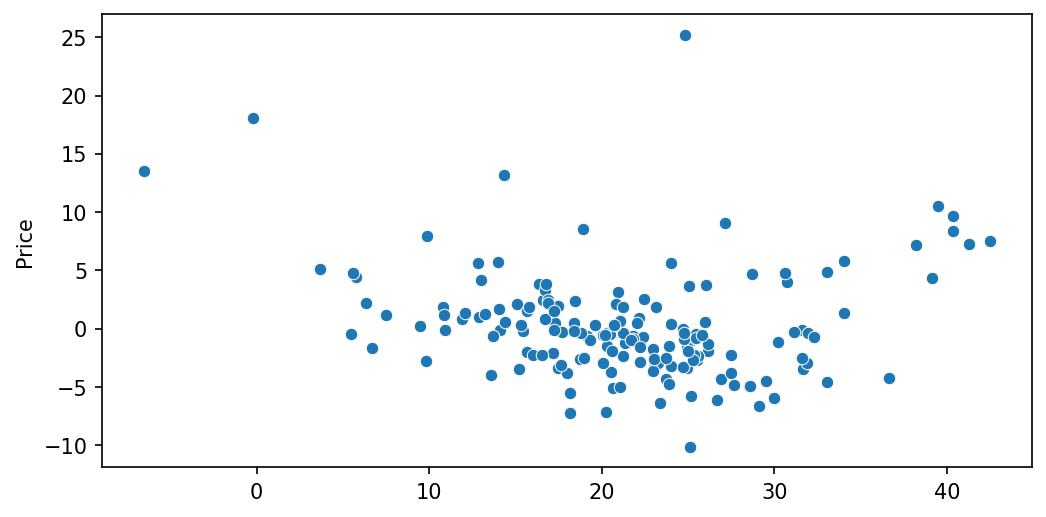

In [319]:
plt.figure(figsize=(8,4), dpi=150)


sns.scatterplot(predictions, residuals)

## THIS DISTRIBUTION IS CALLED UNIFORM DISTRIBUTION (NO SHAPE)

## HOMESCEDASTICITY

### PERFORMANCE METRICS

In [320]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [321]:
mse = mean_squared_error(y_test, predictions)

mse

20.724023437339753

In [322]:
mae = mean_absolute_error(y_test, predictions)

mae

3.148255754816832

In [323]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

rmse

4.552364598463062

In [324]:
r_score = r2_score(y_test, predictions)

r_score

0.7261570836552476

In [325]:
adjusted_r_score = 1 - (1-r_score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

adjusted_r_score

0.7028893848808568

In [326]:
## adjusted_r_score will always be less than r_square

# __RIDGE REGRESSION__

### MODEL BUILDING

In [327]:
from sklearn.linear_model import Ridge

In [328]:
ridge = Ridge(alpha=8)

In [329]:
ridge.fit(X_train,y_train)

Ridge(alpha=8)

In [330]:
ridge.coef_

array([-0.90147796,  0.72691546,  0.22176113,  0.89670478, -1.62910402,
        2.85050315, -0.37029127, -2.73307683,  1.52120278, -0.95331094,
       -1.99210673,  1.02158472, -3.81206614])

In [331]:
ridge.alpha

8

In [332]:
ridge.intercept_

22.970796460176988

In [333]:
ridge_predictions = ridge.predict(X_test)

### Performance metrics

In [334]:
mse_ridge = mean_squared_error(y_test,ridge_predictions)

mse_ridge

20.948083643131184

In [335]:
mae_ridge =mean_absolute_error(y_test,ridge_predictions)

mae_ridge

3.132798476139696

In [336]:
rmse_ridge = np.sqrt(mse_ridge)

rmse_ridge

4.576907650710377

In [337]:
ridge_r_score = r2_score(y_test,ridge_predictions)
print(ridge_r_score)

0.7231963989032617


In [338]:
adjusted_ridge_r_score =  1-(1-ridge_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(adjusted_ridge_r_score)

0.6996771386793559


> Now, the question is whether the value of lambda=10 was an optimal choice or not? To verify this we use __GridSearchCV__

In [339]:
from sklearn.model_selection import GridSearchCV

In [340]:
base_ridge_model = Ridge()

In [341]:
parameter_grid = {'alpha':[0.1,1,5,10,50,100]}

In [342]:
grid_model = GridSearchCV(estimator=base_ridge_model, param_grid=parameter_grid, cv=5, verbose=2)

In [343]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=5; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]}, verbose=2)

In [344]:
grid_model.best_estimator_

Ridge(alpha=10)

In [345]:
grid_model.best_params_

{'alpha': 10}

In [346]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000939,0.000537,0.000227,0.000032,0.1,{'alpha': 0.1},0.669489,0.699573,0.769040,0.743340,0.659608,0.708210,0.042120,4
1,0.000766,0.000117,0.000230,0.000036,1,{'alpha': 1},0.669202,0.700570,0.768889,0.744514,0.659861,0.708607,0.042230,3
2,0.000869,0.000450,0.000250,0.000049,5,{'alpha': 5},0.667702,0.703636,0.767883,0.748213,0.660707,0.709628,0.042590,2
3,0.000609,0.000148,0.000215,0.000022,10,{'alpha': 10},0.665547,0.705930,0.766174,0.750599,0.661349,0.709920,0.042810,1
4,0.000595,0.000127,0.000211,0.000023,50,{'alpha': 50},0.646518,0.712204,0.748186,0.743913,0.658195,0.701803,0.042405,5
5,0.000459,0.000071,0.000189,0.000011,100,{'alpha': 100},0.623474,0.709662,0.723929,0.723138,0.643940,0.684829,0.042543,6


In [347]:
ridge_predictions_grid = grid_model.predict(X_test)

- Performance metrics after using GridSearchCV

In [348]:
print("MSE => ",mean_squared_error(y_test,ridge_predictions_grid))
print("MAE => ",mean_absolute_error(y_test,ridge_predictions_grid))
print("RMSE => ",np.sqrt(mean_squared_error(y_test,ridge_predictions_grid)))

ridge_grid_r_score = r2_score(y_test,ridge_predictions_grid)

ridge_grid_adjusted_r_score = 1-(1-ridge_grid_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"r_square_score => {ridge_grid_r_score}")
print(f"adjusted_r_square_score => {ridge_grid_adjusted_r_score}")

MSE =>  21.00146647350746
MAE =>  3.131145934350394
RMSE =>  4.582735697540003
r_square_score => 0.7224910093346204
adjusted_r_square_score => 0.6989118140493267


### Verifying Assumtions

1. Linearity

Text(0, 0.5, 'Predicted Value')

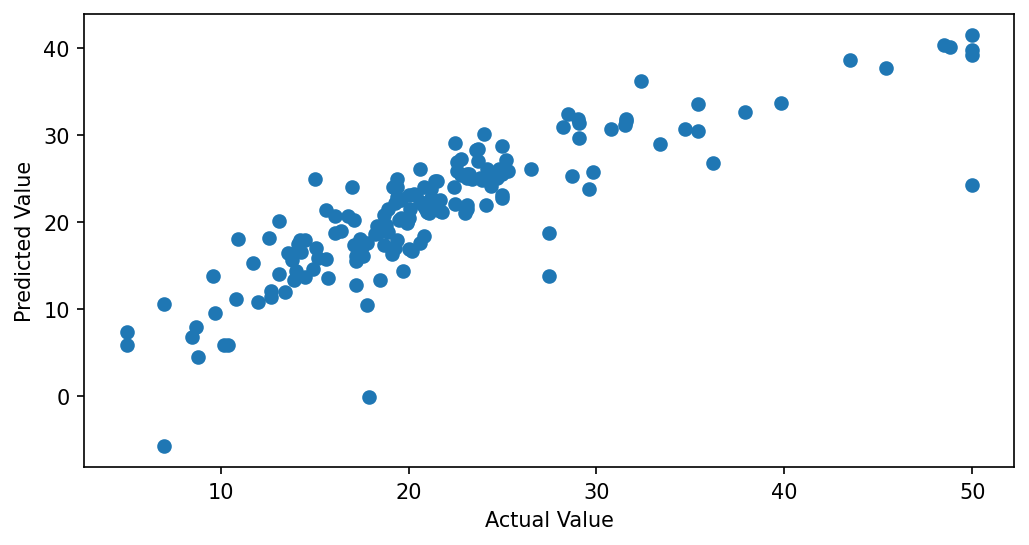

In [349]:
plt.figure(figsize=(8,4), dpi=150)

plt.scatter(y_test,ridge_predictions_grid)
plt.xlabel("Actual Value")
plt.ylabel('Predicted Value')

2. Checking Linearity

In [350]:
residual_ridge = y_test - ridge_predictions_grid

<AxesSubplot:xlabel='Price', ylabel='Density'>

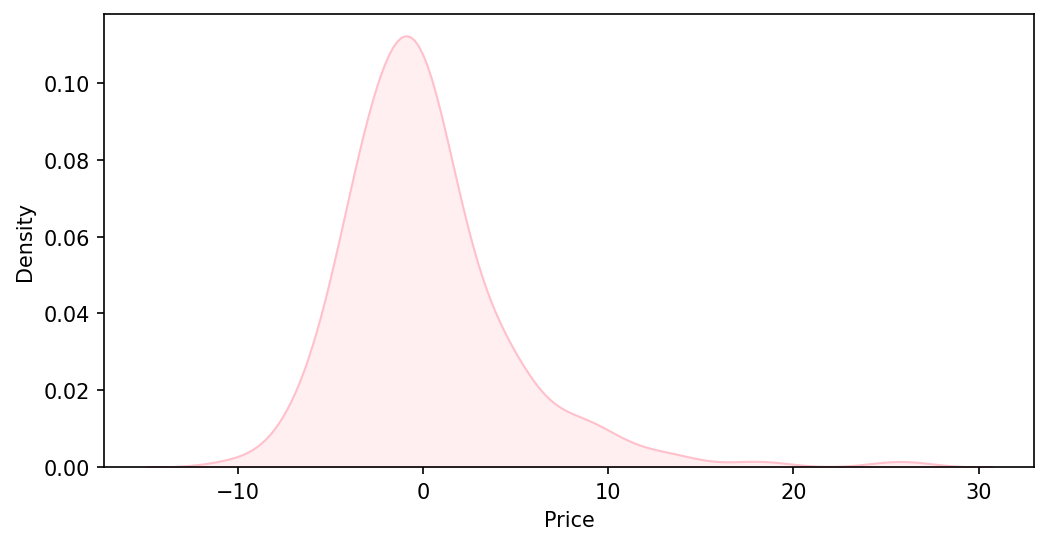

In [351]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(residual_ridge,shade='True', color='pink')

3. Checking Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

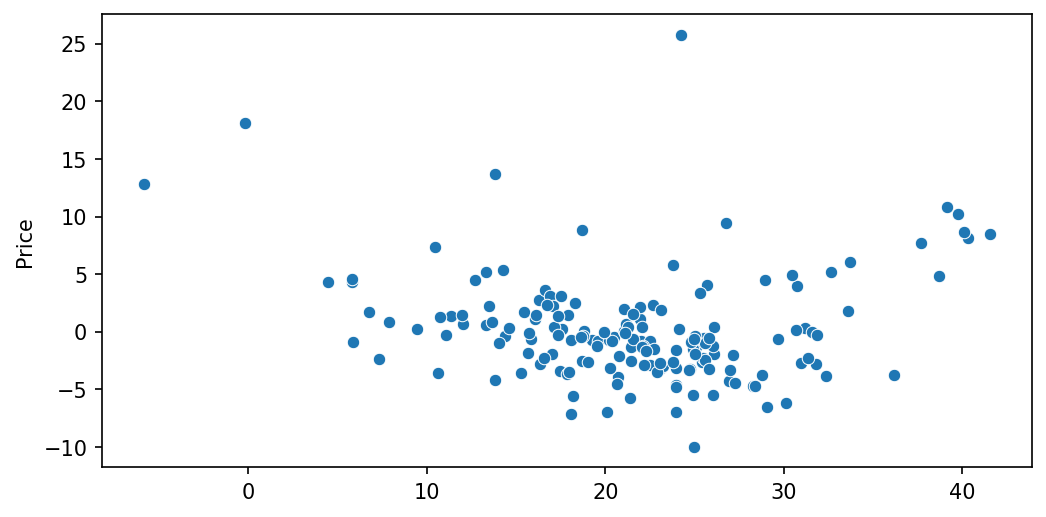

In [352]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(ridge_predictions_grid,residual_ridge)

# __LASSO REGRESSION__

### MODEL BUILDING

In [353]:
from sklearn.linear_model import LassoCV

## Here, instead of using GridSearchCV, we are using LassoCV

In [354]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [355]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [356]:
lasso_cv_model.alpha_

0.7030872263061958

In [357]:
considered_alphas = pd.DataFrame(lasso_cv_model.alphas_)

considered_alphas.sample(10)

,0
30,3.499282
58,1.824528
77,1.172820
79,1.119514
78,1.145857
83,1.020059
90,0.866799
37,2.973527
44,2.526764
91,0.846871


In [358]:
lasso_predictions = lasso_cv_model.predict(X_test)

### Performance Metrics

In [359]:
print("MSE => ",mean_squared_error(y_test,lasso_predictions))
print("MAE => ",mean_absolute_error(y_test,lasso_predictions))
print("RMSE => ",np.sqrt(mean_squared_error(y_test,lasso_predictions)))

lasso_grid_r_score = r2_score(y_test,lasso_predictions)

lasso_grid_adjusted_r_score = 1-(1-lasso_grid_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"r_square_score => {lasso_grid_r_score}")
print(f"adjusted_r_square_score => {lasso_grid_adjusted_r_score}")

MSE =>  25.33519958289586
MAE =>  3.5298272952286602
RMSE =>  5.033408346527814
r_square_score => 0.6652259653665429
adjusted_r_square_score => 0.6367811127506282


### Assumptions

1. Linearity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted data')

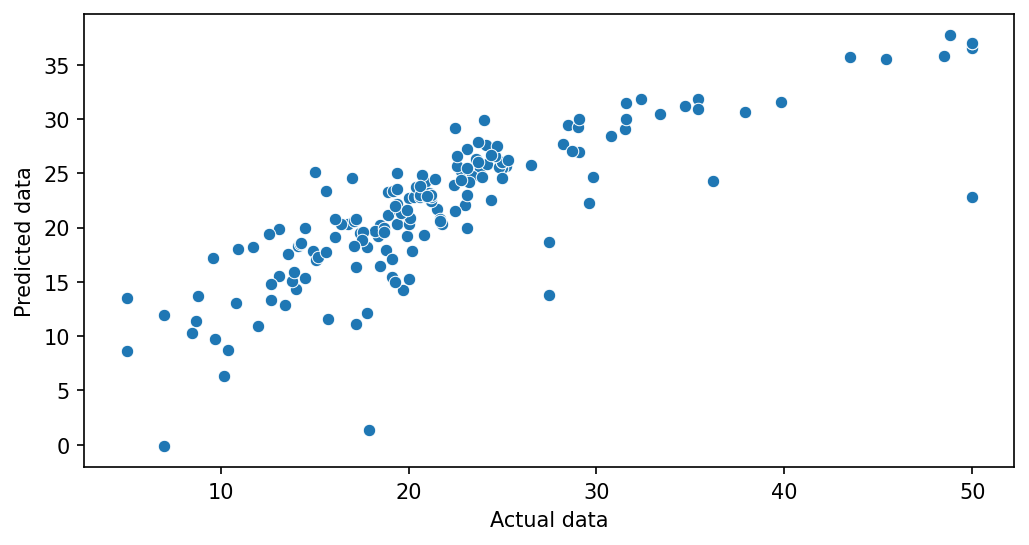

In [360]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(y_test, lasso_predictions)
plt.xlabel("Actual data")
plt.ylabel('Predicted data')

2. Normal Distribution

<AxesSubplot:xlabel='Price', ylabel='Density'>

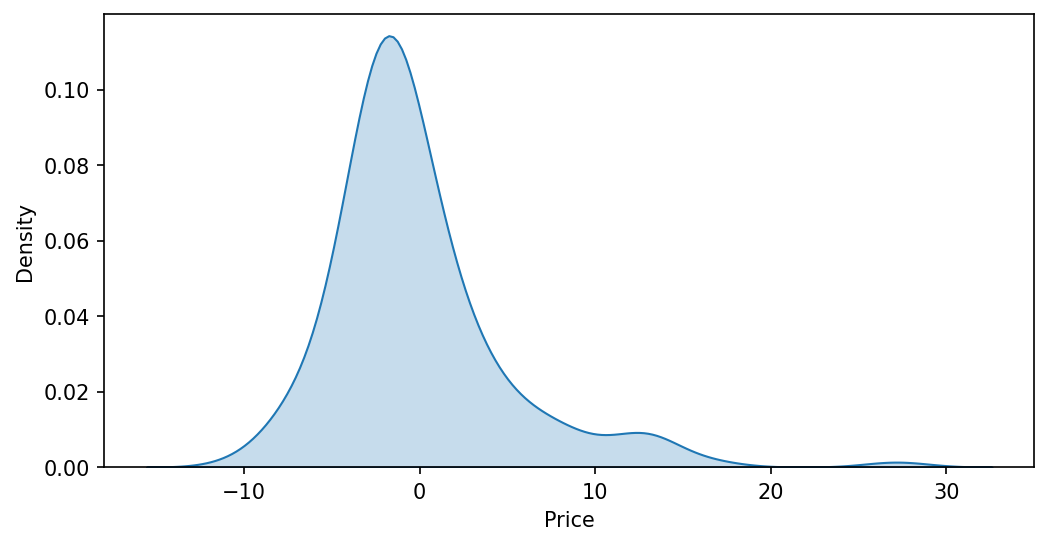

In [361]:
residual_lasso = y_test - lasso_predictions

plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(residual_lasso,shade='True')


3. Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

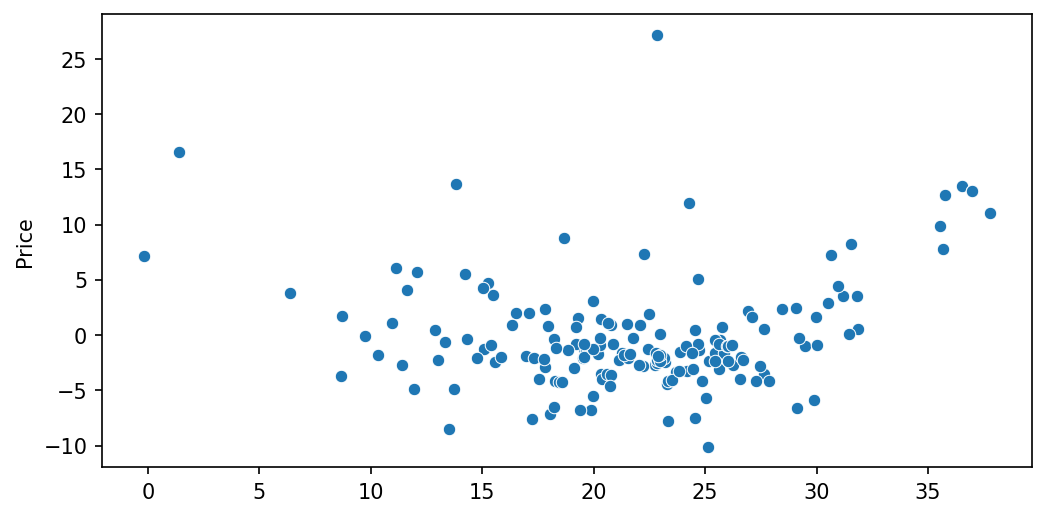

In [362]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(lasso_predictions,residual_lasso)

# __ELASTIC NET__

In [363]:
from sklearn.linear_model import ElasticNetCV

In [364]:
# Note : l1_ration represents the alpha from the equation and n_alphas represent the Lammbda from the equation
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], eps=0.001, n_alphas=100, max_iter=1000000)

In [365]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [366]:
elastic_predictions = elastic_model.predict(X_test)

In [367]:
# Best performing l1 ratio is, here for this model 1.0 means it is disregarding ridge completely and going with only lasso regression
elastic_model.l1_ratio_

0.5

In [368]:
elastic_model.alpha_

0.024573297913054137

<AxesSubplot:xlabel='Price', ylabel='Density'>

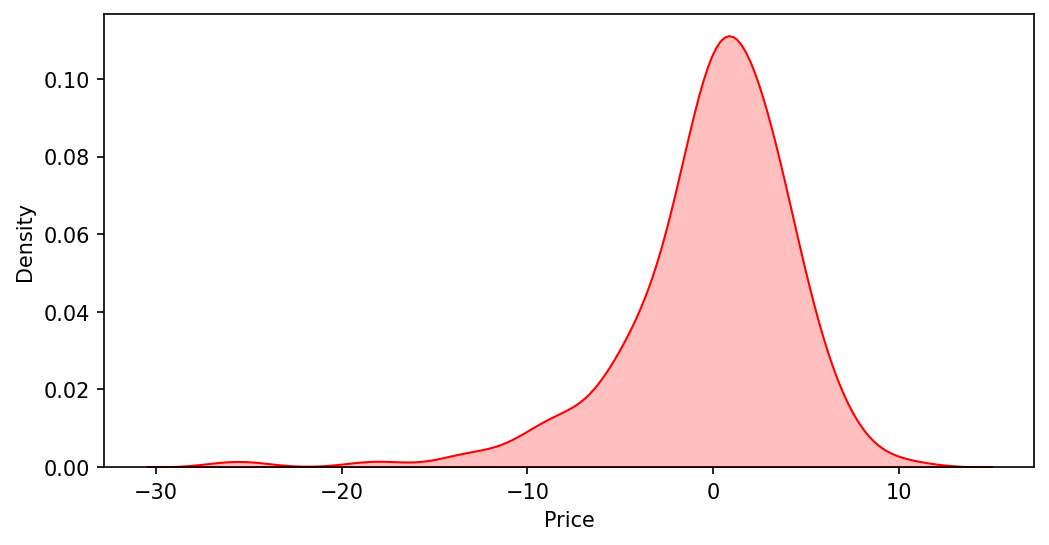

In [369]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(elastic_predictions-y_test,shade=True, color='red')

### Performance Metrics

In [370]:
print("MSE => ",mean_squared_error(y_test,elastic_predictions))
print("MAE => ",mean_absolute_error(y_test,elastic_predictions))
print("RMSE => ",np.sqrt(mean_squared_error(y_test,elastic_predictions)))

elastic_grid_r_score = r2_score(y_test,elastic_predictions)

elastic_grid_adjusted_r_score = 1-(1-elastic_grid_r_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"r_square_score => {elastic_grid_r_score}")
print(f"adjusted_r_square_score => {elastic_grid_adjusted_r_score}")

MSE =>  20.903696804245374
MAE =>  3.1340594308072567
RMSE =>  4.572056080610273
r_square_score => 0.7237829173196573
adjusted_r_square_score => 0.7003134919938765


### ASSUMPTIONS

1. Linearity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted data')

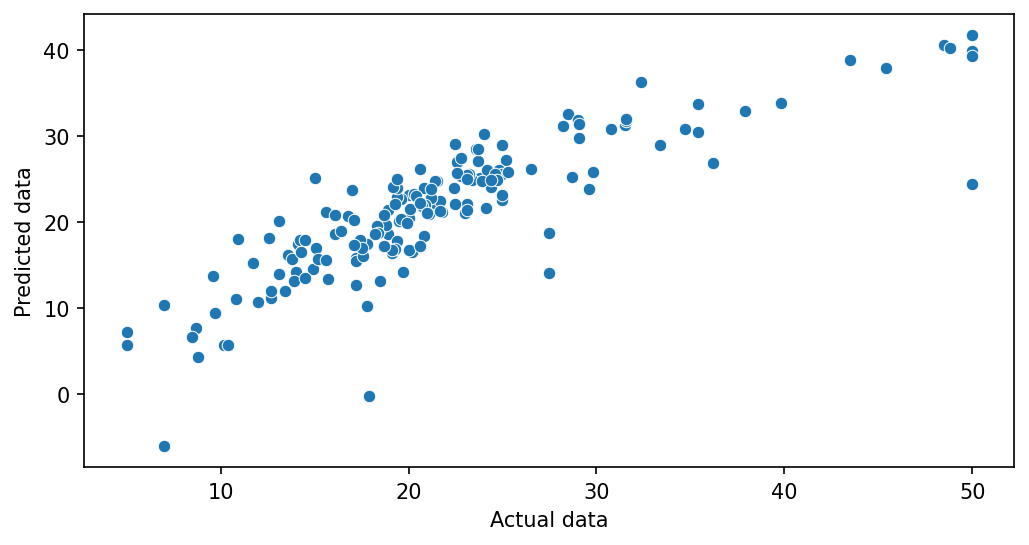

In [371]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(y_test,elastic_predictions)
plt.xlabel("Actual data")
plt.ylabel('Predicted data')

2. Normal Distribution

In [372]:
residual_elastic = y_test - elastic_predictions

<AxesSubplot:xlabel='Price', ylabel='Density'>

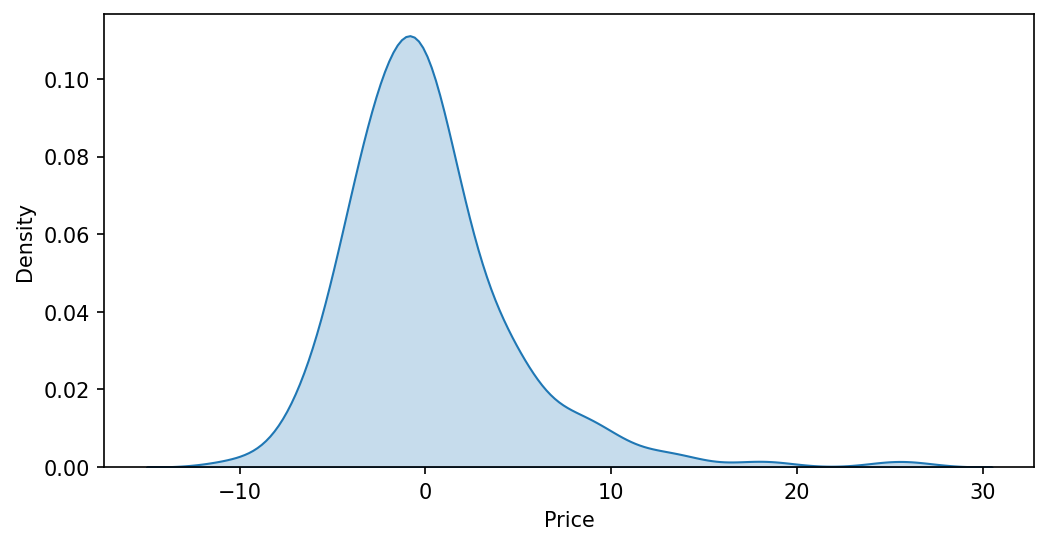

In [373]:
plt.figure(figsize=(8,4), dpi=150)

sns.kdeplot(residual_elastic,shade='True')

3. Uniformity

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

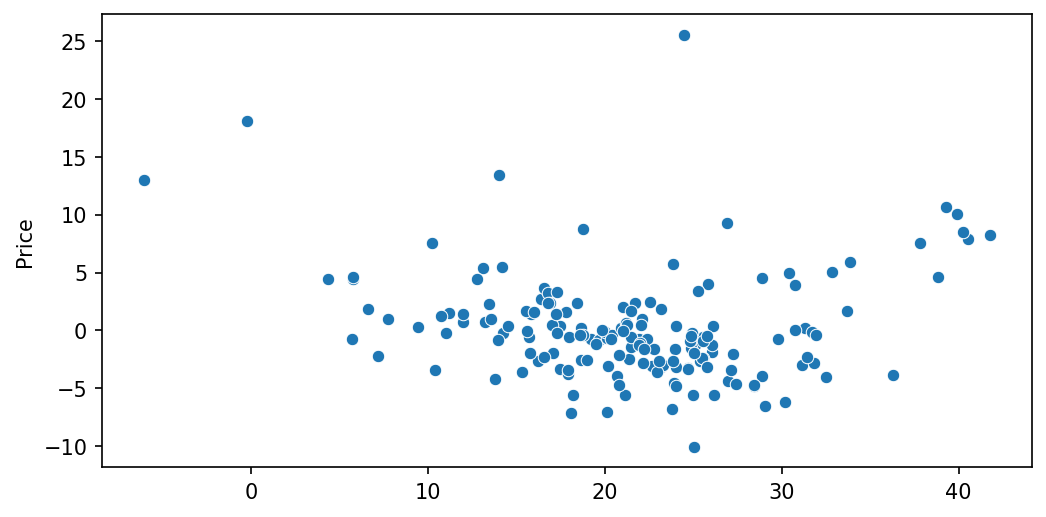

In [374]:
plt.figure(figsize=(8,4), dpi=150)

sns.scatterplot(elastic_predictions,residual_elastic)

## STEPS:

### Training :
    - Initialize weight(w) as 0
    - Initialize bias (b) as 0

### Given a data point :
    - Predict result by using y = wx+b
    - Calculate error
    - Use gradient descent to figure out new weight and bias.
    - Repeat n times

### Testing :
    - Given a data point :
        - Put in the values from data point into the equation (y=wx+b)